## Observation

In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
from copy import deepcopy as cp
import gc; gc.enable()
import matplotlib.pyplot as plt
pd.options.display.max_columns = 100
%matplotlib inline

In [2]:
col_info = {
    'cat_cols':[],
    'num_cols': [], # numerical columns to be boxcox + norm to [0,1]
    'other_cols': []
}

In [3]:
train_df = pd.read_csv("data/train.csv", parse_dates = ["activation_date"])
test_df = pd.read_csv("data/test.csv", parse_dates = ["activation_date"])
print("Train file rows and columns are : ", train_df.shape)
print("Test file rows and columns are : ", test_df.shape)

Train file rows and columns are :  (1503424, 18)
Test file rows and columns are :  (508438, 17)


In [4]:
train_df = train_df.sort_values('activation_date').reset_index(drop=True)

from sklearn.model_selection import train_test_split
train_index, valid_index = train_test_split(np.arange(train_df.shape[0]), test_size=0.1, random_state=519)

In [5]:
train_y = train_df[['deal_probability']]
train_y.to_csv('regression_target.csv', index=False)

train_y.loc[:, 'deal_probability'] = (train_y['deal_probability'].values > .5).astype(int)
train_y.to_csv('classification_target.csv', index=False)

C:\Users\khyeh\Anaconda3\lib\site-packages\pandas\core\indexing.py:621: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [6]:
train_df.head(3)

,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,description,price,item_seq_number,activation_date,user_type,image,image_top_1,deal_probability
0,3b896605f03c,9457abfa0ebf,Самарская область,Самара,Личные вещи,Детская одежда и обувь,Для мальчиков,Верхняя одежда,86-92 см (1-2 года),Зимний комбенизон,Зимний комбенизон для малыша,500.0,12,2017-03-15,Private,a805aa774699aca42e538e1626ef70f806dd38d1bf85eb...,1008.0,0.0
1,c81c34d3aac5,0b161da2b144,Иркутская область,Братск,Бытовая электроника,Телефоны,Аксессуары,Чехлы и плёнки,NaN,Чехол для айфона 6s,Твёрдый пластик,100.0,5,2017-03-15,Private,76c39c52a894c51499da3ee2ddecd98da533ccbdae5096...,2909.0,0.0
2,a8ab6225dd06,93d527a1ca66,Пермский край,Краснокамск,Личные вещи,"Одежда, обувь, аксессуары",Женская одежда,Верхняя одежда,44–46 (M),Продам кожанную куртку,NaN,1500.0,32,2017-03-15,Private,d7cb3c4a84ce9f95958f2995474140b28ae7ad1cd0d6de...,527.0,0.0


In [7]:
test_df['deal_probability'] = np.zeros((test_df.shape[0],))
all_df = pd.concat([train_df, test_df], axis=0).reset_index(drop=True)

In [8]:
display(train_df.head(3))
display(test_df.head(3))

,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,description,price,item_seq_number,activation_date,user_type,image,image_top_1,deal_probability
0,3b896605f03c,9457abfa0ebf,Самарская область,Самара,Личные вещи,Детская одежда и обувь,Для мальчиков,Верхняя одежда,86-92 см (1-2 года),Зимний комбенизон,Зимний комбенизон для малыша,500.0,12,2017-03-15,Private,a805aa774699aca42e538e1626ef70f806dd38d1bf85eb...,1008.0,0.0
1,c81c34d3aac5,0b161da2b144,Иркутская область,Братск,Бытовая электроника,Телефоны,Аксессуары,Чехлы и плёнки,NaN,Чехол для айфона 6s,Твёрдый пластик,100.0,5,2017-03-15,Private,76c39c52a894c51499da3ee2ddecd98da533ccbdae5096...,2909.0,0.0
2,a8ab6225dd06,93d527a1ca66,Пермский край,Краснокамск,Личные вещи,"Одежда, обувь, аксессуары",Женская одежда,Верхняя одежда,44–46 (M),Продам кожанную куртку,NaN,1500.0,32,2017-03-15,Private,d7cb3c4a84ce9f95958f2995474140b28ae7ad1cd0d6de...,527.0,0.0


,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,description,price,item_seq_number,activation_date,user_type,image,image_top_1,deal_probability
0,6544e41a8817,dbe73ad6e4b5,Волгоградская область,Волгоград,Личные вещи,Детская одежда и обувь,Для мальчиков,Обувь,25,Отдам бесплатно,На ангарском,NaN,66,2017-04-18,Private,a8b57acb5ab304f9c331ac7a074219aed4d349d8aef386...,2020.0,0.0
1,65b9484d670f,2e11806abe57,Свердловская область,Нижняя Тура,Хобби и отдых,Велосипеды,Дорожные,NaN,NaN,Продам велосипед,"Продам велосипед KAMA F200,в нормальном состо...",3000.0,4,2017-04-16,Private,NaN,NaN,0.0
2,8bab230b2ecd,0b850bbebb10,Новосибирская область,Бердск,Бытовая электроника,Аудио и видео,Телевизоры и проекторы,NaN,NaN,BBK,Продам новый телевизор BBK 32 диагональ смарт...,15000.0,15,2017-04-17,Private,8c361112cb049745ef2d1b0ae73594fc5c107286b0c942...,2960.0,0.0


### Merge period features

In [9]:
period_df = pd.read_csv('ad_period_features.csv')

C:\Users\khyeh\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
all_df.head(3)

,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,description,price,item_seq_number,activation_date,user_type,image,image_top_1,deal_probability
0,3b896605f03c,9457abfa0ebf,Самарская область,Самара,Личные вещи,Детская одежда и обувь,Для мальчиков,Верхняя одежда,86-92 см (1-2 года),Зимний комбенизон,Зимний комбенизон для малыша,500.0,12,2017-03-15,Private,a805aa774699aca42e538e1626ef70f806dd38d1bf85eb...,1008.0,0.0
1,c81c34d3aac5,0b161da2b144,Иркутская область,Братск,Бытовая электроника,Телефоны,Аксессуары,Чехлы и плёнки,NaN,Чехол для айфона 6s,Твёрдый пластик,100.0,5,2017-03-15,Private,76c39c52a894c51499da3ee2ddecd98da533ccbdae5096...,2909.0,0.0
2,a8ab6225dd06,93d527a1ca66,Пермский край,Краснокамск,Личные вещи,"Одежда, обувь, аксессуары",Женская одежда,Верхняя одежда,44–46 (M),Продам кожанную куртку,NaN,1500.0,32,2017-03-15,Private,d7cb3c4a84ce9f95958f2995474140b28ae7ad1cd0d6de...,527.0,0.0


In [11]:
period_df.head(5)

,new_index,item_id,activation_date,date_from,date_to,duration_1,duration_2,duration_3,renewed_count,is_renewed
0,0fceba64da0d 2017-01-01,0fceba64da0d,2017-01-01,2017-03-15,2017-03-17,73.0,75.0,2,0,0
1,e06329e1ce56 2017-01-01,e06329e1ce56,2017-01-01,2017-03-15,2017-03-17,73.0,75.0,2,0,0
2,0d3f55aa2786 2017-01-01,0d3f55aa2786,2017-01-01,2017-04-12,2017-04-18,101.0,107.0,6,0,0
3,02530587479d 2017-01-01,02530587479d,2017-01-01,2017-04-12,2017-04-18,101.0,107.0,6,0,0
4,a2971556d92b 2017-01-01,a2971556d92b,2017-01-01,2017-03-15,2017-03-16,73.0,74.0,1,0,0


In [12]:
pd.Series(all_df.activation_date.isin(period_df.activation_date.values)).value_counts()

True     2011797
False         65
Name: activation_date, dtype: int64

In [13]:
gp = period_df.groupby('activation_date')

In [14]:
all_df.loc[:,'same_activate_cnt'] = all_df['activation_date'].astype(str).map(gp['duration_1'].count())

In [15]:
# duration_1 duration_2 duration_3 renewed_count is_renewed
mapped_cols = ['duration_1', 'duration_2', 'duration_3', 'renewed_count', 'is_renewed']
new_cols = ['same_activate_cnt']
for col in mapped_cols:
    print('Processing ', col)
    all_df.loc[:,col+'_mean'] = all_df['activation_date'].astype(str).map(gp[col].mean())
    all_df.loc[:,col+'_med'] = all_df['activation_date'].astype(str).map(gp[col].median())
    
    if col != 'is_renewed':
        all_df.loc[:,col+'_min'] = all_df['activation_date'].astype(str).map(gp[col].min())
        all_df.loc[:,col+'_max'] = all_df['activation_date'].astype(str).map(gp[col].max())
    all_df.loc[:,col+'_std'] = all_df['activation_date'].astype(str).map(gp[col].std())
    new_cols.extend([col+'_mean',col+'_med',col+'_min',col+'_max',col+'_std'])

Processing  duration_1
Processing  duration_2
Processing  duration_3
Processing  renewed_count
Processing  is_renewed


In [16]:
new_cols.remove('is_renewed_min')
new_cols.remove('is_renewed_max')
print(new_cols)
all_df[new_cols].head(3)

['same_activate_cnt', 'duration_1_mean', 'duration_1_med', 'duration_1_min', 'duration_1_max', 'duration_1_std', 'duration_2_mean', 'duration_2_med', 'duration_2_min', 'duration_2_max', 'duration_2_std', 'duration_3_mean', 'duration_3_med', 'duration_3_min', 'duration_3_max', 'duration_3_std', 'renewed_count_mean', 'renewed_count_med', 'renewed_count_min', 'renewed_count_max', 'renewed_count_std', 'is_renewed_mean', 'is_renewed_med', 'is_renewed_std']


,same_activate_cnt,duration_1_mean,duration_1_med,duration_1_min,duration_1_max,duration_1_std,duration_2_mean,duration_2_med,duration_2_min,duration_2_max,duration_2_std,duration_3_mean,duration_3_med,duration_3_min,duration_3_max,duration_3_std,renewed_count_mean,renewed_count_med,renewed_count_min,renewed_count_max,renewed_count_std,is_renewed_mean,is_renewed_med,is_renewed_std
0,716790.0,12.912948,0.0,0.0,33.0,13.951994,20.236426,13.0,0.0,34.0,9.02955,7.323478,6.0,0.0,13.0,5.555416,0.445527,0.0,0.0,2.0,0.497047,0.445515,0.0,0.497023
1,716790.0,12.912948,0.0,0.0,33.0,13.951994,20.236426,13.0,0.0,34.0,9.02955,7.323478,6.0,0.0,13.0,5.555416,0.445527,0.0,0.0,2.0,0.497047,0.445515,0.0,0.497023
2,716790.0,12.912948,0.0,0.0,33.0,13.951994,20.236426,13.0,0.0,34.0,9.02955,7.323478,6.0,0.0,13.0,5.555416,0.445527,0.0,0.0,2.0,0.497047,0.445515,0.0,0.497023


In [17]:
all_df[new_cols].isnull().sum()

same_activate_cnt     65
duration_1_mean       65
duration_1_med        65
duration_1_min        65
duration_1_max        65
duration_1_std        65
duration_2_mean       65
duration_2_med        65
duration_2_min        65
duration_2_max        65
duration_2_std        65
duration_3_mean       65
duration_3_med        65
duration_3_min        65
duration_3_max        65
duration_3_std        65
renewed_count_mean    65
renewed_count_med     65
renewed_count_min     65
renewed_count_max     65
renewed_count_std     65
is_renewed_mean       65
is_renewed_med        65
is_renewed_std        65
dtype: int64

In [18]:
all_df.loc[:, new_cols] = all_df.loc[:, new_cols].fillna(0)

In [19]:
all_df[new_cols].isnull().sum()

same_activate_cnt     0
duration_1_mean       0
duration_1_med        0
duration_1_min        0
duration_1_max        0
duration_1_std        0
duration_2_mean       0
duration_2_med        0
duration_2_min        0
duration_2_max        0
duration_2_std        0
duration_3_mean       0
duration_3_med        0
duration_3_min        0
duration_3_max        0
duration_3_std        0
renewed_count_mean    0
renewed_count_med     0
renewed_count_min     0
renewed_count_max     0
renewed_count_std     0
is_renewed_mean       0
is_renewed_med        0
is_renewed_std        0
dtype: int64

In [20]:
col_info['num_cols'].extend(['same_activate_cnt', 'duration_1_mean', 'duration_1_med', 'duration_1_min', 'duration_1_max', 'duration_1_std', 'duration_2_mean', 'duration_2_med', 'duration_2_min', 'duration_2_max', 'duration_2_std', 'duration_3_mean', 'duration_3_med', 'duration_3_min', 'duration_3_max', 'duration_3_std', 'renewed_count_mean', 'renewed_count_med', 'renewed_count_min', 'renewed_count_max', 'renewed_count_std', 'is_renewed_mean', 'is_renewed_med', 'is_renewed_std'])

In [21]:
del period_df, gp; gc.collect()

187

### Merge aggregated features

In [22]:
agg_features = pd.read_csv('aggregated_features.csv').set_index('user_id')
agg_features.head(3)

,avg_days_up_user,avg_times_up_user,med_days_up_user,med_times_up_user,n_user_items
user_id,,,,,
00000077ff21,12.5,2.0,12.5,2.0,2
000006497719,19.0,2.0,19.0,2.0,1
00000b4d72f6,3.0,1.0,3.0,1.0,1


In [23]:
new_cols = ['avg_days_up_user', 'avg_times_up_user', 'med_days_up_user', 'med_times_up_user', 'n_user_items']
for col in new_cols:
    all_df.loc[:, col] = all_df['user_id'].map(agg_features[col])
    print(col+' processed')

avg_days_up_user processed
avg_times_up_user processed
med_days_up_user processed
med_times_up_user processed
n_user_items processed


In [24]:
all_df.loc[:, new_cols] = all_df[new_cols].fillna(0)
all_df.isnull().sum()

item_id                       0
user_id                       0
region                        0
city                          0
parent_category_name          0
category_name                 0
param_1                   84486
param_2                  887771
param_3                 1168896
title                         0
description              116276
price                    115947
item_seq_number               0
activation_date               0
user_type                     0
image                    155197
image_top_1              155197
deal_probability              0
same_activate_cnt             0
duration_1_mean               0
duration_1_med                0
duration_1_min                0
duration_1_max                0
duration_1_std                0
duration_2_mean               0
duration_2_med                0
duration_2_min                0
duration_2_max                0
duration_2_std                0
duration_3_mean               0
duration_3_med                0
duration

In [25]:
col_info['num_cols'].extend(['avg_days_up_user', 'avg_times_up_user', 'med_days_up_user', 'med_times_up_user', 'n_user_items'])

In [26]:
del agg_features; gc.collect()

80

### Merge active features

In [27]:
active_features = pd.read_csv('active_features.csv')
active_features.head(3)

,user_id,item_id,activation_date,avg_price,avg_title_len,avg_title_word_cnt,avg_title_unique_word_cnt,avg_title_unqiue_percent,avg_description_len,avg_description_word_cnt,avg_description_unique_word_cnt,avg_description_unqiue_percent,avg_types_item_id,avg_types_city,avg_types_region,avg_types_parent_category_name,avg_types_category_name
0,00000077ff21,371634034b2b,2017-03-15,0.225268,0.403870,0.561866,0.634359,1.0,0.778156,0.590407,0.676512,0.955565,1.000000,1.000000,1.000000,1.000000,1.000000
1,00000077ff21,3f13f59b23da,2017-03-24,0.213139,0.395843,0.506851,0.571405,1.0,0.702463,0.515168,0.584236,0.977708,1.000000,0.854049,0.854142,1.000000,1.000000
2,00000077ff21,3f13f59b23da,2017-04-12,0.206339,0.393140,0.485912,0.547469,1.0,0.661887,0.478927,0.540256,0.985122,0.127257,0.776804,0.776938,0.878616,0.836233


In [28]:
select_mask = (active_features.user_id.isin(all_df.user_id)) & \
              (active_features.item_id.isin(all_df.item_id)) & \
              (active_features.activation_date.isin(all_df.activation_date.astype(str)))
        
active_features = active_features.loc[select_mask,:].reset_index(drop=True)
active_features.shape

(2011862, 17)

In [29]:
gc.collect()

39

In [30]:
active_features.loc[:, 'temp_id'] = active_features.user_id + active_features.item_id + active_features.activation_date.astype(str)
all_df.loc[:, 'temp_id'] = all_df.user_id + all_df.item_id + all_df.activation_date.astype(str)

In [31]:
active_features = active_features.set_index('temp_id')
active_features.head(2)

,user_id,item_id,activation_date,avg_price,avg_title_len,avg_title_word_cnt,avg_title_unique_word_cnt,avg_title_unqiue_percent,avg_description_len,avg_description_word_cnt,avg_description_unique_word_cnt,avg_description_unqiue_percent,avg_types_item_id,avg_types_city,avg_types_region,avg_types_parent_category_name,avg_types_category_name
temp_id,,,,,,,,,,,,,,,,,
0000312c4672daf6372193bf2017-03-22,0000312c4672,daf6372193bf,2017-03-22,0.234286,0.335973,0.506851,0.571405,1.0,0.669973,0.479882,0.534146,0.890039,1.0,1.000000,1.000000,1.000000,1.000000
0000326c60428b2644d943b92017-03-18,0000326c6042,8b2644d943b9,2017-03-18,0.196748,0.291353,0.409606,0.460372,1.0,0.544710,0.374898,0.409111,0.842591,1.0,0.435371,0.435593,0.564177,0.564177


In [32]:
for col in active_features.columns.tolist()[3:]:
    all_df.loc[:, col] = all_df['temp_id'].map(active_features[col])
    print(col+' processed')

avg_price processed
avg_title_len processed
avg_title_word_cnt processed
avg_title_unique_word_cnt processed
avg_title_unqiue_percent processed
avg_description_len processed
avg_description_word_cnt processed
avg_description_unique_word_cnt processed
avg_description_unqiue_percent processed
avg_types_item_id processed
avg_types_city processed
avg_types_region processed
avg_types_parent_category_name processed
avg_types_category_name processed


In [33]:
all_df.isnull().sum()

item_id                                  0
user_id                                  0
region                                   0
city                                     0
parent_category_name                     0
category_name                            0
param_1                              84486
param_2                             887771
param_3                            1168896
title                                    0
description                         116276
price                               115947
item_seq_number                          0
activation_date                          0
user_type                                0
image                               155197
image_top_1                         155197
deal_probability                         0
same_activate_cnt                        0
duration_1_mean                          0
duration_1_med                           0
duration_1_min                           0
duration_1_max                           0
duration_1_

In [34]:
col_info['other_cols'].extend([
    'avg_price',
    'avg_title_len',
    'avg_title_word_cnt',
    'avg_title_unique_word_cnt',
    'avg_title_unqiue_percent',
    'avg_description_len',
    'avg_description_word_cnt',
    'avg_description_unique_word_cnt',
    'avg_description_unqiue_percent',
    'avg_types_item_id',
    'avg_types_city',
    'avg_types_region',
    'avg_types_parent_category_name',
    'avg_types_category_name'
])

In [35]:
all_df.drop(['item_id', 'temp_id'], axis=1, inplace=True)
del active_features; gc.collect()
all_df.head(3)

,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,description,price,item_seq_number,activation_date,user_type,image,image_top_1,deal_probability,same_activate_cnt,duration_1_mean,duration_1_med,duration_1_min,duration_1_max,duration_1_std,duration_2_mean,duration_2_med,duration_2_min,duration_2_max,duration_2_std,duration_3_mean,duration_3_med,duration_3_min,duration_3_max,duration_3_std,renewed_count_mean,renewed_count_med,renewed_count_min,renewed_count_max,renewed_count_std,is_renewed_mean,is_renewed_med,is_renewed_std,avg_days_up_user,avg_times_up_user,med_days_up_user,med_times_up_user,n_user_items,avg_price,avg_title_len,avg_title_word_cnt,avg_title_unique_word_cnt,avg_title_unqiue_percent,avg_description_len,avg_description_word_cnt,avg_description_unique_word_cnt,avg_description_unqiue_percent,avg_types_item_id,avg_types_city,avg_types_region,avg_types_parent_category_name,avg_types_category_name
0,9457abfa0ebf,Самарская область,Самара,Личные вещи,Детская одежда и обувь,Для мальчиков,Верхняя одежда,86-92 см (1-2 года),Зимний комбенизон,Зимний комбенизон для малыша,500.0,12,2017-03-15,Private,a805aa774699aca42e538e1626ef70f806dd38d1bf85eb...,1008.0,0.0,716790.0,12.912948,0.0,0.0,33.0,13.951994,20.236426,13.0,0.0,34.0,9.02955,7.323478,6.0,0.0,13.0,5.555416,0.445527,0.0,0.0,2.0,0.497047,0.445515,0.0,0.497023,6.5,1.5,6.5,1.5,5.0,0.185920,0.344968,0.395415,0.444199,1.0,0.400499,0.288371,0.314299,1.0,1.0,0.854049,0.854142,0.80087,0.73607
1,0b161da2b144,Иркутская область,Братск,Бытовая электроника,Телефоны,Аксессуары,Чехлы и плёнки,NaN,Чехол для айфона 6s,Твёрдый пластик,100.0,5,2017-03-15,Private,76c39c52a894c51499da3ee2ddecd98da533ccbdae5096...,2909.0,0.0,716790.0,12.912948,0.0,0.0,33.0,13.951994,20.236426,13.0,0.0,34.0,9.02955,7.323478,6.0,0.0,13.0,5.555416,0.445527,0.0,0.0,2.0,0.497047,0.445515,0.0,0.497023,15.0,2.0,15.0,2.0,2.0,0.163298,0.434891,0.561866,0.634359,1.0,0.321049,0.246516,0.265301,1.0,1.0,1.000000,1.000000,1.00000,1.00000
2,93d527a1ca66,Пермский край,Краснокамск,Личные вещи,"Одежда, обувь, аксессуары",Женская одежда,Верхняя одежда,44–46 (M),Продам кожанную куртку,NaN,1500.0,32,2017-03-15,Private,d7cb3c4a84ce9f95958f2995474140b28ae7ad1cd0d6de...,527.0,0.0,716790.0,12.912948,0.0,0.0,33.0,13.951994,20.236426,13.0,0.0,34.0,9.02955,7.323478,6.0,0.0,13.0,5.555416,0.445527,0.0,0.0,2.0,0.497047,0.445515,0.0,0.497023,0.0,0.0,0.0,0.0,0.0,0.203050,0.478589,0.506851,0.571405,1.0,0.229834,0.000000,0.000000,0.0,1.0,0.854049,0.854142,0.80087,0.73607


In [36]:
all_df.user_id.value_counts()

ee74bccca74f    1414
abcdd1ca1a5c    1303
b239811ad530    1302
45ba3f23bf25    1213
82a96987d0f8    1015
60dfed1efb6e     970
a2ef0215eec3     960
82348911d21c     931
ac2280e23cbe     851
b5003ea27e7a     684
2cd9f03d6527     657
9bf10bd38655     595
4bdf52a81f23     558
41f112adb74b     547
c337541311f8     527
33d09dfdbd90     523
4d2eb0bfc2a4     515
da6e825c0fdb     508
ae6586719bec     501
818d647950cc     500
6be8de23ae72     500
b6f2091f0c0c     493
37e959df25fa     490
c4723507345b     469
a8f76e9334d4     465
838127830416     463
743f3355d84a     462
3b8134afbafe     431
18f28166ea10     431
68a3f4a6c928     420
                ... 
227f5d7968b2       1
cd840d29efcc       1
ee9c6fd0927f       1
39b910537434       1
c6393cfbbef4       1
c85f19f3505d       1
980188c238ec       1
b195572f7b73       1
655a2ad22eeb       1
2fc94c48577e       1
100bf03a59c4       1
444b960b8367       1
1cc275b6ec97       1
6018bf8d3e82       1
de36f57672ed       1
5500b5b77c1c       1
ff53943d5634 

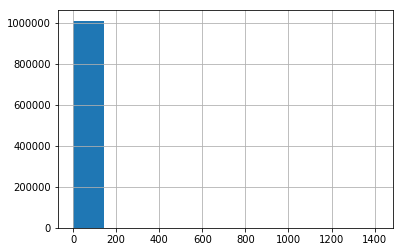

In [37]:
all_df.user_id.value_counts().hist()
plt.show()

In [38]:
pd.Series(all_df.user_id.value_counts()>50).value_counts()

False    1009132
True         777
Name: user_id, dtype: int64

In [39]:
all_df.region.value_counts()

Краснодарский край         186514
Свердловская область       127883
Ростовская область         116667
Татарстан                  111319
Челябинская область        107178
Самарская область           99914
Нижегородская область       98529
Башкортостан                93212
Пермский край               85264
Новосибирская область       84386
Красноярский край           71359
Саратовская область         65696
Волгоградская область       64444
Кемеровская область         60008
Иркутская область           58619
Воронежская область         57805
Омская область              57509
Алтайский край              55317
Ставропольский край         51210
Тюменская область           47825
Ярославская область         43712
Калининградская область     43280
Оренбургская область        39932
Удмуртия                    38862
Белгородская область        37905
Ханты-Мансийский АО         37793
Владимирская область        35504
Тульская область            34216
Name: region, dtype: int64

In [40]:
all_df.city.value_counts()

Екатеринбург        85993
Краснодар           84526
Новосибирск         76814
Нижний Новгород     69806
Ростов-на-Дону      68019
Челябинск           66444
Казань              64054
Пермь               63663
Самара              57398
Уфа                 56110
Омск                55434
Красноярск          50717
Воронеж             47518
Волгоград           43920
Саратов             42338
Тюмень              41179
Калининград         37660
Барнаул             36645
Ярославль           33411
Иркутск             33023
Оренбург            30626
Ижевск              29958
Сочи                29529
Тольятти            28005
Кемерово            24668
Белгород            23062
Тула                21345
Набережные Челны    21135
Ставрополь          20965
Новокузнецк         18391
                    ...  
Прочноокопская          1
Расшеватская            1
Марковский              1
Быстрогорский           1
Хатанга                 1
Калья                   1
Садовое                 1
Мартюш      

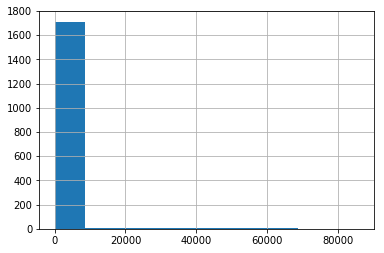

In [41]:
all_df.city.value_counts().hist()
plt.show()

In [42]:
pd.Series(all_df.city.value_counts()>100).value_counts()

False    1200
True      552
Name: city, dtype: int64

In [43]:
all_df.parent_category_name.value_counts()

Личные вещи            914200
Для дома и дачи        243733
Бытовая электроника    231290
Недвижимость           210577
Хобби и отдых          117282
Транспорт              109792
Услуги                  88004
Животные                72446
Для бизнеса             24538
Name: parent_category_name, dtype: int64

In [44]:
all_df.category_name.value_counts()

Одежда, обувь, аксессуары       367649
Детская одежда и обувь          352013
Товары для детей и игрушки      135280
Квартиры                        114015
Телефоны                         88075
Предложение услуг                88004
Мебель и интерьер                87217
Автомобили                       85101
Ремонт и строительство           78263
Бытовая техника                  45202
Дома, дачи, коттеджи             40672
Товары для компьютера            39269
Красота и здоровье               38541
Аудио и видео                    36014
Спорт и отдых                    33658
Коллекционирование               32348
Земельные участки                22594
Оборудование для бизнеса         21772
Часы и украшения                 20717
Велосипеды                       15875
Собаки                           15851
Книги и журналы                  15805
Другие животные                  15210
Игры, приставки и программы      14678
Кошки                            14499
Ноутбуки                 

In [45]:
all_df.param_1.value_counts()

Женская одежда              292931
Для девочек                 198526
Продам                      156778
Для мальчиков               152731
С пробегом                   83124
Аксессуары                   51529
Мужская одежда               47097
Другое                       38156
Детские коляски              35916
Игрушки                      35177
Сдам                         31929
Ремонт, строительство        29308
Стройматериалы               29009
iPhone                       24592
Кровати, диваны и кресла     23402
Для кухни                    21463
Инструменты                  21395
Комплектующие                20086
Детская мебель               19028
Шкафы и комоды               15300
Приборы и аксессуары         15132
Для дома                     13488
Транспорт, перевозки         13222
Сниму                        11375
Товары для кормления         11371
Велосипеды и самокаты        11177
Samsung                      10985
Книги                        10858
Другая              

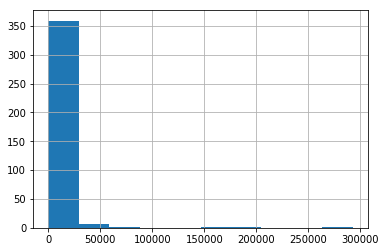

In [46]:
all_df.param_1.value_counts().hist()
plt.show()

In [47]:
pd.Series(all_df.param_1.value_counts()>50).value_counts()

True     301
False     70
Name: param_1, dtype: int64

In [48]:
all_df.param_2.value_counts()

Обувь                                199226
Верхняя одежда                       176606
Платья и юбки                         92214
Другое                                47528
Трикотаж                              41196
Брюки                                 34236
1                                     31990
2                                     31186
На длительный срок                    29909
Дом                                   28208
ВАЗ (LADA)                            26463
Комбинезоны и боди                    22950
3                                     17737
Поселений (ИЖС)                       14861
Пиджаки и костюмы                     13707
Рубашки и блузки                      13069
Джинсы                                12182
Шапки, варежки, шарфы                 11972
Гараж                                  9766
Строительство домов, коттеджей         9330
Дача                                   9131
Чехлы и плёнки                         9017
Стиральные машины               

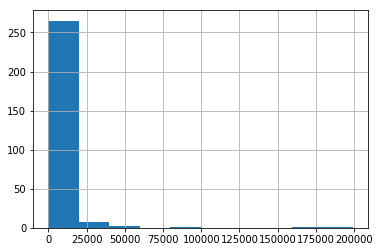

In [49]:
all_df.param_2.value_counts().hist()
plt.show()

In [50]:
pd.Series(all_df.param_2.value_counts()>50).value_counts()

True     189
False     88
Name: param_2, dtype: int64

In [51]:
all_df.param_3.value_counts()

Вторичка                  68922
42–44 (S)                 61575
44–46 (M)                 45932
86-92 см (1-2 года)       37287
98-104 см (2-4 года)      33297
74-80 см (7-12 мес)       30584
Без размера               25375
110-116 см (4-6 лет)      24487
40–42 (XS)                24467
46–48 (L)                 24023
62-68 см (2-6 мес)        21317
38                        19519
37                        18944
122-128 см (6-8 лет)      17789
36                        15309
Новостройка               15016
1                         13771
39                        13206
48–50 (XL)                12736
134-140 см (8-10 лет)     12518
> 50 (XXL)                12286
146-152 см (10-12 лет)    11426
25                         8979
22                         8953
23                         8849
21                         8821
26                         8628
2                          8195
24                         7967
< 19                       7523
                          ...  
Progres 

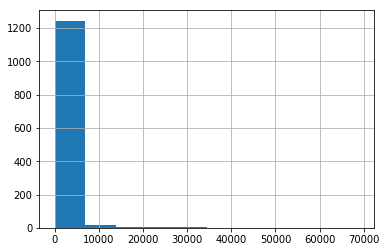

In [52]:
all_df.param_3.value_counts().hist()
plt.show()

In [53]:
pd.Series(all_df.param_3.value_counts()>50).value_counts()

False    944
True     332
Name: param_3, dtype: int64

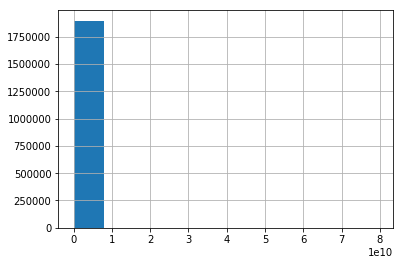

In [54]:
all_df.price.hist()
plt.show()

In [55]:
all_df.item_seq_number.value_counts()

1         121849
2          78774
3          64432
4          56266
5          50246
6          46185
7          42736
8          39954
9          37731
10         35782
11         33588
12         31778
13         30254
14         28714
15         27518
16         26303
17         25162
18         24217
19         23179
20         22258
21         21569
22         20714
23         19909
24         19290
25         18702
26         17987
27         17439
28         16957
29         16352
30         16126
           ...  
13047          1
10996          1
78847          1
15804          1
13757          1
11710          1
9663           1
72095          1
41384          1
33196          1
31486          1
12733          1
125647         1
14780          1
28412          1
59333          1
18169          1
15805          1
14071          1
11711          1
72088          1
9973           1
49571          1
33195          1
28621          1
52968          1
46823          1
40674         

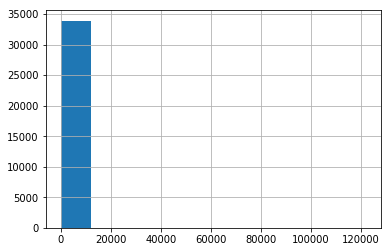

In [56]:
all_df.item_seq_number.value_counts().hist()
plt.show()

In [57]:
pd.Series(all_df.item_seq_number.value_counts()>100).value_counts()

False    33271
True       676
Name: item_seq_number, dtype: int64

In [58]:
all_df.user_type.value_counts()

Private    1433965
Company     467198
Shop        110699
Name: user_type, dtype: int64

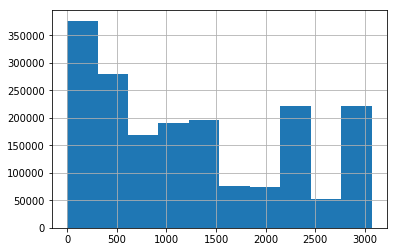

In [59]:
all_df.image_top_1.hist()
plt.show()

In [60]:
all_df.image_top_1.value_counts()

1002.0    26042
2219.0    25373
2918.0    20537
2218.0    20143
2264.0    19569
42.0      15629
82.0      14720
47.0      14023
1118.0    13909
84.0      13437
2262.0    11284
2220.0    10995
2370.0    10541
96.0      10251
2217.0    10144
44.0       9636
1055.0     9561
88.0       9314
91.0       9111
2932.0     9048
523.0      8879
97.0       8379
1108.0     8229
52.0       8207
2221.0     8204
93.0       7767
1431.0     7661
53.0       7367
45.0       7167
1132.0     7092
          ...  
1595.0        5
157.0         5
2567.0        5
2672.0        5
2211.0        5
2257.0        5
2562.0        5
591.0         5
318.0         5
332.0         4
2163.0        4
612.0         4
2087.0        4
380.0         4
200.0         3
207.0         3
2312.0        3
144.0         3
2659.0        3
2689.0        3
2685.0        3
2212.0        3
2682.0        3
1748.0        2
2664.0        2
258.0         2
2663.0        1
614.0         1
2250.0        1
2680.0        1
Name: image_top_1, Lengt

In [61]:
pd.Series(all_df.image_top_1.value_counts()>100).value_counts()

True     2259
False     804
Name: image_top_1, dtype: int64

In [62]:
all_df.isnull().sum()

user_id                                  0
region                                   0
city                                     0
parent_category_name                     0
category_name                            0
param_1                              84486
param_2                             887771
param_3                            1168896
title                                    0
description                         116276
price                               115947
item_seq_number                          0
activation_date                          0
user_type                                0
image                               155197
image_top_1                         155197
deal_probability                         0
same_activate_cnt                        0
duration_1_mean                          0
duration_1_med                           0
duration_1_min                           0
duration_1_max                           0
duration_1_std                           0
duration_2_

In [63]:
na_cols = ['param_1', 'param_2', 'param_3', 'description']
all_df.loc[:, na_cols] = all_df[na_cols].fillna('unknown')

na_cols =['price', 'image_top_1']
all_df.loc[:, na_cols] = all_df[na_cols].fillna(-1)

In [64]:
all_df.loc[:, 'param_1_is_na'] = (all_df['param_1'] == 'unknown').astype(int)
all_df.loc[:, 'param_2_is_na'] = (all_df['param_2'] == 'unknown').astype(int)
all_df.loc[:, 'param_3_is_na'] = (all_df['param_3'] == 'unknown').astype(int)
all_df.loc[:, 'description_is_na'] = (all_df['description'] == 'unknown').astype(int)
all_df.loc[:, 'price_is_na'] = (all_df['price'] == -1).astype(int)
all_df.loc[:, 'image_top_1_is_na'] = (all_df['image_top_1'] == -1).astype(int)

In [65]:
all_df.drop(['image'], axis=1, inplace=True)

In [66]:
all_df.isnull().sum().max()

0

In [67]:
col_info['other_cols'].extend([
    'param_1_is_na',
    'param_2_is_na',
    'param_3_is_na',
    'description_is_na',
    'price_is_na',
    'image_top_1_is_na'
])

In [68]:
print(col_info)

{'cat_cols': [], 'num_cols': ['same_activate_cnt', 'duration_1_mean', 'duration_1_med', 'duration_1_min', 'duration_1_max', 'duration_1_std', 'duration_2_mean', 'duration_2_med', 'duration_2_min', 'duration_2_max', 'duration_2_std', 'duration_3_mean', 'duration_3_med', 'duration_3_min', 'duration_3_max', 'duration_3_std', 'renewed_count_mean', 'renewed_count_med', 'renewed_count_min', 'renewed_count_max', 'renewed_count_std', 'is_renewed_mean', 'is_renewed_med', 'is_renewed_std', 'avg_days_up_user', 'avg_times_up_user', 'med_days_up_user', 'med_times_up_user', 'n_user_items'], 'other_cols': ['avg_price', 'avg_title_len', 'avg_title_word_cnt', 'avg_title_unique_word_cnt', 'avg_title_unqiue_percent', 'avg_description_len', 'avg_description_word_cnt', 'avg_description_unique_word_cnt', 'avg_description_unqiue_percent', 'avg_types_item_id', 'avg_types_city', 'avg_types_region', 'avg_types_parent_category_name', 'avg_types_category_name', 'param_1_is_na', 'param_2_is_na', 'param_3_is_na', '

## Text Features (Meta)

In [69]:
def get_contains_feature(df, col1, col2):
    print('processing ', col1, col2)
    res_df = pd.DataFrame()
    str1s = df[col1].values
    str2s = df[col2].values
    
    is_contains = []
    contains_counts = []
    for i in range(len(str1s)):
        str1 = str(str1s[i])
        str2 = str(str2s[i])
        str1 = str1.split(" ")
        str2 = str2.split(" ")
        
        contains_count = 0
        for s in str1:
            if s in str2:
                contains_count += 1
                
        is_contains.append(1 if contains_count > 0 else 0)
        contains_counts.append(contains_count)
        
    res_df['{}_in_{}'.format(col1,col2)] = is_contains
    res_df['{}_in_{}_counts'.format(col1,col2)] = contains_counts
    del is_contains, contains_counts; gc.collect()
    return res_df 

In [70]:
all_df = pd.concat([all_df, get_contains_feature(all_df, 'region', 'title')],  axis=1)
all_df = pd.concat([all_df, get_contains_feature(all_df, 'city', 'title')],  axis=1)
all_df = pd.concat([all_df, get_contains_feature(all_df, 'parent_category_name', 'title')],  axis=1)
all_df = pd.concat([all_df, get_contains_feature(all_df, 'category_name', 'title')],  axis=1)
all_df = pd.concat([all_df, get_contains_feature(all_df, 'region', 'description')],  axis=1)
all_df = pd.concat([all_df, get_contains_feature(all_df, 'city', 'description')],  axis=1)
all_df = pd.concat([all_df, get_contains_feature(all_df, 'parent_category_name', 'description')],  axis=1)
all_df = pd.concat([all_df, get_contains_feature(all_df, 'category_name', 'description')],  axis=1)
all_df = pd.concat([all_df, get_contains_feature(all_df, 'title', 'description')],  axis=1)

processing  region title
processing  city title
processing  parent_category_name title
processing  category_name title
processing  region description
processing  city description
processing  parent_category_name description
processing  category_name description
processing  title description


In [71]:
all_df.loc[:, 'desc_char_count'] = all_df['description'].map(lambda x: 0 if type(x)==float else len(x))
all_df.loc[:, 'desc_space_count'] = all_df['description'].map(lambda x: 0 if type(x)==float else x.count(' '))
all_df.loc[:, 'desc_unique_words_count'] = all_df['description'].apply(lambda comment: len(set(w for w in comment.split())))
all_df.loc[:, 'desc_percnt_unique_words'] = all_df['desc_unique_words_count'] / (all_df['desc_space_count']+1) # Count Unique Words

all_df.loc[:, 'surprise_count'] = all_df['description'].map(lambda x: 0 if type(x)==float else x.count('!'))
all_df.loc[:, 'question_count'] = all_df['description'].map(lambda x: 0 if type(x)==float else x.count('?'))
all_df.loc[:, 'quote_count'] = all_df['description'].map(lambda x: 0 if type(x)==float else x.count('\"'))
all_df.loc[:, 'quote_count2'] = all_df['description'].map(lambda x: 0 if type(x)==float else x.count('\''))

all_df.loc[:, 'tit_char_count'] = all_df['title'].map(lambda x: 0 if type(x)==float else len(x))
all_df.loc[:, 'tit_space_count'] = all_df['title'].map(lambda x: 0 if type(x)==float else x.count(' '))
all_df.loc[:, 'tit_unique_words_count'] = all_df['title'].apply(lambda comment: len(set(w for w in comment.split())))
all_df.loc[:, 'tit_percnt_unique_words'] = all_df['tit_unique_words_count'] / (all_df['tit_space_count']+1) # Count Unique Words

In [72]:
all_df.columns.tolist()

['user_id',
 'region',
 'city',
 'parent_category_name',
 'category_name',
 'param_1',
 'param_2',
 'param_3',
 'title',
 'description',
 'price',
 'item_seq_number',
 'activation_date',
 'user_type',
 'image_top_1',
 'deal_probability',
 'same_activate_cnt',
 'duration_1_mean',
 'duration_1_med',
 'duration_1_min',
 'duration_1_max',
 'duration_1_std',
 'duration_2_mean',
 'duration_2_med',
 'duration_2_min',
 'duration_2_max',
 'duration_2_std',
 'duration_3_mean',
 'duration_3_med',
 'duration_3_min',
 'duration_3_max',
 'duration_3_std',
 'renewed_count_mean',
 'renewed_count_med',
 'renewed_count_min',
 'renewed_count_max',
 'renewed_count_std',
 'is_renewed_mean',
 'is_renewed_med',
 'is_renewed_std',
 'avg_days_up_user',
 'avg_times_up_user',
 'med_days_up_user',
 'med_times_up_user',
 'n_user_items',
 'avg_price',
 'avg_title_len',
 'avg_title_word_cnt',
 'avg_title_unique_word_cnt',
 'avg_title_unqiue_percent',
 'avg_description_len',
 'avg_description_word_cnt',
 'avg_descrip

In [73]:
all_df.isnull().sum()

user_id                                       0
region                                        0
city                                          0
parent_category_name                          0
category_name                                 0
param_1                                       0
param_2                                       0
param_3                                       0
title                                         0
description                                   0
price                                         0
item_seq_number                               0
activation_date                               0
user_type                                     0
image_top_1                                   0
deal_probability                              0
same_activate_cnt                             0
duration_1_mean                               0
duration_1_med                                0
duration_1_min                                0
duration_1_max                          

In [74]:
col_info['num_cols'].extend([
    'region_in_title_counts',
    'city_in_title_counts',
    'parent_category_name_in_title_counts',
    'category_name_in_title_counts',
    'region_in_description_counts',
    'city_in_description_counts',
    'parent_category_name_in_description_counts',
    'category_name_in_description_counts',
    'title_in_description_counts',
    'desc_char_count',
    'desc_space_count',
    'desc_unique_words_count',
    'desc_percnt_unique_words',
    'surprise_count',
    'question_count',
    'quote_count',
    'quote_count2',
    'tit_char_count',
    'tit_space_count',
    'tit_unique_words_count',
    'tit_percnt_unique_words'
])
col_info['other_cols'].extend([
    'region_in_title',
    'city_in_title',
    'parent_category_name_in_title',
    'category_name_in_title',
    'region_in_description',
    'city_in_description',
    'parent_category_name_in_description',
    'category_name_in_description',
    'title_in_description',
])

### Save clean text features

In [75]:
text_feature = all_df['region'] + ' ' + all_df['city'] + ' ' + \
                all_df['param_1'] + ' ' + all_df['param_2'] + ' ' + all_df['param_3'] + ' ' + \
                all_df['parent_category_name'] + ' ' + all_df['category_name'] + ' ' + \
                all_df['title'] + ' ' + all_df['description']

In [76]:
stopwords = ['а', 'е', 'и', 'ж', 'м', 'о', 'на', 'не', 'ни', 'об', 'но', 'он', 'мне', 'мои', 'мож', 'она', 'они', 'оно', 'мной', 'много', 'многочисленное', 'многочисленная', 'многочисленные', 'многочисленный', 'мною', 'мой', 'мог', 'могут', 'можно', 'может', 'можхо', 'мор', 'моя', 'моё', 'мочь', 'над', 'нее', 'оба', 'нам', 'нем', 'нами', 'ними', 'мимо', 'немного', 'одной', 'одного', 'менее', 'однажды', 'однако', 'меня', 'нему', 'меньше', 'ней', 'наверху', 'него', 'ниже', 'мало', 'надо', 'один', 'одиннадцать', 'одиннадцатый', 'назад', 'наиболее', 'недавно', 'миллионов', 'недалеко', 'между', 'низко', 'меля', 'нельзя', 'нибудь', 'непрерывно', 'наконец', 'никогда', 'никуда', 'нас', 'наш', 'нет', 'нею', 'неё', 'них', 'мира', 'наша', 'наше', 'наши', 'ничего', 'начала', 'нередко', 'несколько', 'обычно', 'опять', 'около', 'мы', 'ну', 'нх', 'от', 'отовсюду', 'особенно', 'нужно', 'очень', 'отсюда', 'в', 'во', 'вон', 'вниз', 'внизу', 'вокруг', 'вот', 'восемнадцать', 'восемнадцатый', 'восемь', 'восьмой', 'вверх', 'вам', 'вами', 'важное', 'важная', 'важные', 'важный', 'вдали', 'везде', 'ведь', 'вас', 'ваш', 'ваша', 'ваше', 'ваши', 'впрочем', 'весь', 'вдруг', 'вы', 'все', 'второй', 'всем', 'всеми', 'времени', 'время', 'всему', 'всего', 'всегда', 'всех', 'всею', 'всю', 'вся', 'всё', 'всюду', 'г', 'год', 'говорил', 'говорит', 'года', 'году', 'где', 'да', 'ее', 'за', 'из', 'ли', 'же', 'им', 'до', 'по', 'ими', 'под', 'иногда', 'довольно', 'именно', 'долго', 'позже', 'более', 'должно', 'пожалуйста', 'значит', 'иметь', 'больше', 'пока', 'ему', 'имя', 'пор', 'пора', 'потом', 'потому', 'после', 'почему', 'почти', 'посреди', 'ей', 'два', 'две', 'двенадцать', 'двенадцатый', 'двадцать', 'двадцатый', 'двух', 'его', 'дел', 'или', 'без', 'день', 'занят', 'занята', 'занято', 'заняты', 'действительно', 'давно', 'девятнадцать', 'девятнадцатый', 'девять', 'девятый', 'даже', 'алло', 'жизнь', 'далеко', 'близко', 'здесь', 'дальше', 'для', 'лет', 'зато', 'даром', 'первый', 'перед', 'затем', 'зачем', 'лишь', 'десять', 'десятый', 'ею', 'её', 'их', 'бы', 'еще', 'при', 'был', 'про', 'процентов', 'против', 'просто', 'бывает', 'бывь', 'если', 'люди', 'была', 'были', 'было', 'будем', 'будет', 'будете', 'будешь', 'прекрасно', 'буду', 'будь', 'будто', 'будут', 'ещё', 'пятнадцать', 'пятнадцатый', 'друго', 'другое', 'другой', 'другие', 'другая', 'других', 'есть', 'пять', 'быть', 'лучше', 'пятый', 'к', 'ком', 'конечно', 'кому', 'кого', 'когда', 'которой', 'которого', 'которая', 'которые', 'который', 'которых', 'кем', 'каждое', 'каждая', 'каждые', 'каждый', 'кажется', 'как', 'какой', 'какая', 'кто', 'кроме', 'куда', 'кругом', 'с', 'т', 'у', 'я', 'та', 'те', 'уж', 'со', 'то', 'том', 'снова', 'тому', 'совсем', 'того', 'тогда', 'тоже', 'собой', 'тобой', 'собою', 'тобою', 'сначала', 'только', 'уметь', 'тот', 'тою', 'хорошо', 'хотеть', 'хочешь', 'хоть', 'хотя', 'свое', 'свои', 'твой', 'своей', 'своего', 'своих', 'свою', 'твоя', 'твоё', 'раз', 'уже', 'сам', 'там', 'тем', 'чем', 'сама', 'сами', 'теми', 'само', 'рано', 'самом', 'самому', 'самой', 'самого', 'семнадцать', 'семнадцатый', 'самим', 'самими', 'самих', 'саму', 'семь', 'чему', 'раньше', 'сейчас', 'чего', 'сегодня', 'себе', 'тебе', 'сеаой', 'человек', 'разве', 'теперь', 'себя', 'тебя', 'седьмой', 'спасибо', 'слишком', 'так', 'такое', 'такой', 'такие', 'также', 'такая', 'сих', 'тех', 'чаще', 'четвертый', 'через', 'часто', 'шестой', 'шестнадцать', 'шестнадцатый', 'шесть', 'четыре', 'четырнадцать', 'четырнадцатый', 'сколько', 'сказал', 'сказала', 'сказать', 'ту', 'ты', 'три', 'эта', 'эти', 'что', 'это', 'чтоб', 'этом', 'этому', 'этой', 'этого', 'чтобы', 'этот', 'стал', 'туда', 'этим', 'этими', 'рядом', 'тринадцать', 'тринадцатый', 'этих', 'третий', 'тут', 'эту', 'суть', 'чуть', 'тысяч']

In [77]:
def clean_text(txt):
    words = str(txt).split(" .!?^+-*/@~:;/\\\"\'&{}[]()#$%") #str(txt).split(" ") #
    words = [wrd for wrd in words if wrd not in stopwords and len(wrd) > 1]
    txt = " ".join(words)
    return txt

In [78]:
text_feature = text_feature.apply(lambda x: clean_text(x))

In [79]:
import pickle
with open('text_feature.pickle', 'wb') as handle:
    pickle.dump(text_feature, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [80]:
del text_feature; gc.collect()

270

In [81]:
all_df.drop(['title', 'description'], axis=1, inplace=True); gc.collect()

0

## Categorical Features

In [82]:
from sklearn.preprocessing import LabelEncoder as LE

In [83]:
def get_filtered_types(feature):
    vc = all_df[feature].value_counts()
    feature_types = vc.index
    train_len = len(train_y)
    train_filter = feature_types.isin(all_df.loc[train_index, feature].values)
    valid_filter = feature_types.isin(all_df.loc[valid_index, feature].values)
    test_filter = feature_types.isin(all_df.loc[train_len:, feature].values)
    final_filter = train_filter & valid_filter & test_filter
    
    print(feature, ': Original feature types # = {}, new feature types # = {}'.format(
            len(feature_types), pd.Series(final_filter).value_counts()[1]))
    return feature_types[final_filter]

In [84]:
feat_thres = [('city', 100), ('param_1', 50), ('param_2', 50), ('param_3', 50), ('user_id', 50)]
for ft in feat_thres:
    feature = ft[0]
    th = ft[1]
    
    remain_feature_types = get_filtered_types(feature)
    all_df.loc[~all_df[feature].isin(remain_feature_types), feature] = 'others'

city : Original feature types # = 1752, new feature types # = 1314
param_1 : Original feature types # = 372, new feature types # = 342
param_2 : Original feature types # = 278, new feature types # = 234
param_3 : Original feature types # = 1277, new feature types # = 638
user_id : Original feature types # = 1009909, new feature types # = 12823


In [85]:
feat_thres = [('item_seq_number', 100), ('image_top_1', 100)]
for ft in feat_thres:
    feature = ft[0]
    th = ft[1]
    
    remain_feature_types = get_filtered_types(feature)
    all_df.loc[~all_df[feature].isin(remain_feature_types), feature] = -1

item_seq_number : Original feature types # = 33947, new feature types # = 4155
image_top_1 : Original feature types # = 3064, new feature types # = 2978


In [86]:
labelize_cols = ['region', 'city', 'user_id', 'parent_category_name', 'category_name',
                 'param_1', 'param_2', 'param_3', 'item_seq_number', 'user_type',
                 'image_top_1']

In [87]:
for col in labelize_cols:
    print(col, ' processed.')
    all_df.loc[:, col] = LE().fit_transform(all_df[col]) 

region  processed.
city  processed.
user_id  processed.
parent_category_name  processed.
category_name  processed.
param_1  processed.
param_2  processed.
param_3  processed.
item_seq_number  processed.
user_type  processed.
image_top_1  processed.


In [88]:
col_info['cat_cols'].extend(labelize_cols)

### Add Categories Interactions

In [89]:
pairs = [('region', 'city'), ('parent_category_name', 'category_name'), 
         ('parent_category_name', 'param_1'), ('parent_category_name', 'param_2'), ('parent_category_name', 'param_3'), 
         ('category_name', 'param_1'), ('category_name', 'param_2'), ('category_name', 'param_3'),
         ('parent_category_name', 'region'), ('category_name', 'region'),
         #('parent_category_name', 'city'), ('category_name', 'city'),
         #('parent_category_name', 'image_top_1'), ('category_name', 'image_top_1'),
        ]

In [90]:
for pair in pairs:
    col1 = pair[0]
    col2 = pair[1]
    print('Processing pair:', pair)
    all_df.loc[:, col1+'_'+col2] = all_df[col1].astype(str)+'_'+all_df[col2].astype(str)
    all_df.loc[:, col1+'_'+col2] = LE().fit_transform(all_df[col1+'_'+col2]) 

Processing pair: ('region', 'city')
Processing pair: ('parent_category_name', 'category_name')
Processing pair: ('parent_category_name', 'param_1')
Processing pair: ('parent_category_name', 'param_2')
Processing pair: ('parent_category_name', 'param_3')
Processing pair: ('category_name', 'param_1')
Processing pair: ('category_name', 'param_2')
Processing pair: ('category_name', 'param_3')
Processing pair: ('parent_category_name', 'region')
Processing pair: ('category_name', 'region')


In [91]:
all_df.region_city.value_counts()

532     85993
1347    84526
212     76814
171     69806
417     68019
915     66444
756     64054
345     63663
472     57398
585     56110
245     55434
101     50717
1116    47518
1067    43920
496     42338
822     41179
1201    37660
1       36645
966     33411
1172    33023
282     30626
860     29958
1259    29529
429     28005
1236    24668
992     23062
787     21345
768     21135
651     20965
1246    18391
        ...  
110         4
1134        4
94          4
291         4
1113        4
814         4
551         4
1003        4
1180        4
122         4
81          4
1393        4
146         4
789         3
346         3
573         3
392         3
1283        3
430         3
113         3
1312        3
1185        3
1050        2
720         2
325         2
183         2
1239        2
722         1
109         1
23          1
Name: region_city, Length: 1407, dtype: int64

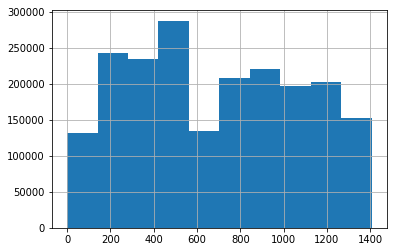

In [92]:
all_df.region_city.hist()
plt.show()

In [93]:
pd.Series(all_df.region_city.value_counts()>50).value_counts()

True     794
False    613
Name: region_city, dtype: int64

In [94]:
all_df.parent_category_name_category_name.value_counts()

25    367649
23    352013
26    135280
30    114015
6      88075
39     88004
11     87217
35     85101
15     78263
16     45202
28     40672
7      39269
24     38541
1      36014
45     33658
41     32348
29     22594
9      21772
27     20717
46     15875
21     15851
40     15805
18     15210
0      14678
19     14499
3      14016
38     13295
14     12966
12     12389
22     11654
5      11652
31     11476
32     11409
8      11302
34     10263
42      9112
4       8895
20      8729
36      8281
13      7696
2       7389
17      6503
44      6094
43      4390
37      3115
10      2766
33       148
Name: parent_category_name_category_name, dtype: int64

In [95]:
all_df.parent_category_name_param_1.value_counts()

219    292931
241    198526
243    156778
218    152731
259     83124
222     47097
240     35916
220     35177
244     31929
291     29308
110     29009
182     26988
236     26633
55      24592
63      24084
99      23402
60      22594
113     22026
93      21463
95      21395
16      20086
239     19028
304     17886
114     15300
225     15132
91      13488
293     13222
245     11375
229     11371
238     11177
        ...  
174        30
342        29
200        29
210        27
157        26
271        26
146        23
208        21
203        21
265        20
196        19
154        19
195        18
190        17
248        17
216        17
344        16
143        15
212        12
207        11
198        11
33         11
155        11
133        10
183        10
150        10
137         8
138         8
209         5
211         4
Name: parent_category_name_param_1, Length: 359, dtype: int64

In [96]:
all_df.parent_category_name_param_2.value_counts()

64     222915
43     201449
53     199226
18     189066
66     176606
246    117282
56      92214
47      72446
49      46700
61      41196
65      34236
67      31990
68      31186
76      29909
237     29855
69      28208
177     26463
26      24538
50      22950
176     21522
86      17737
80      14861
54      13707
58      13069
48      12182
63      11972
98       9766
224      9330
100      9131
17       9017
        ...  
106        31
160        31
94         29
144        28
136        27
142        25
242        25
199        24
143        23
152        23
183        20
97         20
216        20
234        17
139        16
110        16
135        16
166        16
0          15
222        12
148        11
73         10
93          9
131         9
71          9
138         7
174         7
118         6
132         5
95          3
Name: parent_category_name_param_2, Length: 247, dtype: int64

In [97]:
all_df.parent_category_name_param_3.value_counts()

40     281587
2      243733
0      231290
655    117282
654     88004
69      84617
3       72446
74      68922
59      61575
4       45932
17      37287
18      33297
15      30584
618     25399
41      25375
1       24538
30      24487
55      24467
7       24023
14      21317
51      19519
49      18944
43      17789
48      15309
84      15016
63      13771
52      13206
10      12736
50      12518
27      12286
        ...  
183         5
252         5
230         5
481         5
191         5
345         5
94          5
267         5
145         5
330         5
193         5
65          5
263         4
380         4
409         4
106         4
550         4
559         4
161         4
366         4
604         4
394         4
297         3
353         3
114         3
602         3
110         3
644         2
92          2
495         2
Name: parent_category_name_param_3, Length: 656, dtype: int64

In [98]:
pd.Series(all_df.parent_category_name_param_3.value_counts()>50).value_counts()

True     343
False    313
Name: parent_category_name_param_3, dtype: int64

In [99]:
all_df.category_name_param_1.value_counts()

149    292931
5      198526
3      152731
31      83938
1       83124
150     47097
355     35916
346     35177
7       34147
196     29308
215     29009
152     26633
335     24592
110     23402
382     21463
209     21395
21      20947
358     20086
32      19658
354     19028
340     16911
118     15300
103     15132
141     14016
380     13488
198     13222
208     12966
40      11853
356     11654
348     11371
        ...  
244        26
235        23
277        21
281        21
123        20
241        19
271        19
96         18
267        17
393        17
100        17
295        16
83         15
284        12
273        11
242        11
323        11
280        11
263        10
238        10
228        10
230         8
81          8
137         8
413         7
396         7
282         5
283         4
336         1
140         1
Name: category_name_param_1, Length: 429, dtype: int64

In [100]:
pd.Series(all_df.category_name_param_1.value_counts()>50).value_counts()

True     372
False     57
Name: category_name_param_1, dtype: int64

In [101]:
all_df.category_name_param_2.value_counts()

256    135280
77     106402
84      94861
145     92824
126     87217
156     81745
244     78263
253     71164
147     61371
125     38541
157     36014
247     33658
111     32348
96      31990
80      31206
97      31186
79      30843
232     29855
85      28208
75      28164
154     27621
71      26463
98      25020
83      23826
76      22950
140     21772
271     20717
267     19183
142     18536
100     17737
        ...  
54         31
4          31
106        29
38         28
30         27
237        25
36         25
194        24
46         23
37         23
178        20
211        20
109        20
229        17
7          16
29         16
60         16
33         16
165        15
217        12
42         11
138        10
136         9
25          9
105         9
32          7
68          7
14          6
26          5
107         3
Name: category_name_param_2, Length: 299, dtype: int64

In [102]:
pd.Series(all_df.category_name_param_2.value_counts()>50).value_counts()

True     252
False     47
Name: category_name_param_2, dtype: int64

In [103]:
all_df.category_name_param_3.value_counts()

693    135280
692     88075
684     88004
622     87217
688     78263
611     68922
675     61575
659     46157
636     45932
698     45202
583     40892
695     39269
621     38541
568     37287
679     36014
594     34452
691     33658
569     33297
616     32348
566     30584
573     24487
671     24467
639     24023
635     21772
600     21372
565     21317
697     20717
668     19519
667     18944
586     17789
        ...  
140         5
4           5
240         5
255         5
55          5
162         5
93          5
83          5
103         5
101         5
391         5
606         5
514         4
319         4
304         4
173         4
469         4
71          4
290         4
460         4
16          4
276         4
24          3
512         3
20          3
263         3
207         3
554         2
2           2
405         2
Name: category_name_param_3, Length: 711, dtype: int64

In [104]:
pd.Series(all_df.category_name_param_3.value_counts()>50).value_counts()

True     394
False    317
Name: category_name_param_3, dtype: int64

In [105]:
all_df.parent_category_name_region.value_counts()

123    69121
139    60218
131    50584
115    49215
120    47835
121    47281
116    44951
119    44313
126    44210
113    39190
114    36673
167    35117
117    32174
122    31884
138    30389
134    28154
112    27649
136    25777
83     24912
135    24488
132    23177
137    22233
27     20470
128    20311
70     17893
129    17880
118    17260
133    16774
130    16508
125    15757
       ...  
194     1355
221     1348
192     1345
101     1304
172     1262
31      1169
39      1140
109     1135
32      1130
102     1117
47      1036
35      1007
50       773
41       734
45       682
52       676
44       673
30       639
28       586
51       576
38       562
54       528
33       516
40       418
46       412
34       385
53       337
48       321
49       306
43       296
Name: parent_category_name_region, Length: 252, dtype: int64

In [106]:
all_df.category_name_region.value_counts()

598     28533
39      26367
614     25672
47      20967
195     20885
31      20245
596     19891
595     19811
606     19508
35      19239
590     18446
601     18439
32      18169
55      17997
591     17982
37      17539
36      17068
594     17024
588     16670
589     15533
42      15250
29      14054
30      13452
592     13384
33      13147
54      13105
38      12794
597     12453
782     11724
613     11580
        ...  
929        24
1215       23
1209       20
513        14
518        10
515         9
528         8
522         6
526         6
520         6
507         5
529         5
508         5
944         5
511         5
516         4
524         3
505         3
527         3
523         3
506         2
521         2
525         2
512         2
514         1
510         1
509         1
517         1
519         1
504         1
Name: category_name_region, Length: 1315, dtype: int64

In [107]:
pd.Series(all_df.category_name_region.value_counts()>50).value_counts()

True     1266
False      49
Name: category_name_region, dtype: int64

In [108]:
feat_thres = [('region_city', 50), ('parent_category_name_category_name', 1),
              ('parent_category_name_param_1', 50),
              ('parent_category_name_param_2', 50),
              ('parent_category_name_param_3', 50),
              ('category_name_param_1', 50), 
              ('category_name_param_2', 50),
              ('category_name_param_3', 50), 
              ('category_name_region', 50)]
for ft in feat_thres:
    feature = ft[0]
    th = ft[1]
    
    remain_feature_types = get_filtered_types(feature)
    all_df.loc[~all_df[feature].isin(remain_feature_types), feature] = -1
    all_df.loc[:, feature] = LE().fit_transform(all_df[feature]) 

region_city : Original feature types # = 1407, new feature types # = 1365
parent_category_name_category_name : Original feature types # = 47, new feature types # = 47
parent_category_name_param_1 : Original feature types # = 359, new feature types # = 357
parent_category_name_param_2 : Original feature types # = 247, new feature types # = 246
parent_category_name_param_3 : Original feature types # = 656, new feature types # = 649
category_name_param_1 : Original feature types # = 429, new feature types # = 423
category_name_param_2 : Original feature types # = 299, new feature types # = 298
category_name_param_3 : Original feature types # = 711, new feature types # = 702
category_name_region : Original feature types # = 1315, new feature types # = 1293


In [109]:
col_info['cat_cols'].extend([
    'region_city',
    'parent_category_name_category_name',
    'parent_category_name_param_1',
    'parent_category_name_param_2',
    'parent_category_name_param_3',
    'category_name_param_1',
    'category_name_param_2',
    'category_name_param_3',
    'category_name_region'
])

## Contiguos Features: Price

In [110]:
col_info['num_cols'].extend(['price'])

In [111]:
col_info['num_cols']

['same_activate_cnt',
 'duration_1_mean',
 'duration_1_med',
 'duration_1_min',
 'duration_1_max',
 'duration_1_std',
 'duration_2_mean',
 'duration_2_med',
 'duration_2_min',
 'duration_2_max',
 'duration_2_std',
 'duration_3_mean',
 'duration_3_med',
 'duration_3_min',
 'duration_3_max',
 'duration_3_std',
 'renewed_count_mean',
 'renewed_count_med',
 'renewed_count_min',
 'renewed_count_max',
 'renewed_count_std',
 'is_renewed_mean',
 'is_renewed_med',
 'is_renewed_std',
 'avg_days_up_user',
 'avg_times_up_user',
 'med_days_up_user',
 'med_times_up_user',
 'n_user_items',
 'region_in_title_counts',
 'city_in_title_counts',
 'parent_category_name_in_title_counts',
 'category_name_in_title_counts',
 'region_in_description_counts',
 'city_in_description_counts',
 'parent_category_name_in_description_counts',
 'category_name_in_description_counts',
 'title_in_description_counts',
 'desc_char_count',
 'desc_space_count',
 'desc_unique_words_count',
 'desc_percnt_unique_words',
 'surprise

## Dates Features ?

In [112]:
print(all_df.activation_date.value_counts())
print(all_df.loc[:train_df.shape[0], 'activation_date'].value_counts())
print(all_df.loc[train_df.shape[0]:, 'activation_date'].value_counts())

2017-03-20    115190
2017-03-27    114863
2017-03-19    114416
2017-03-26    113513
2017-03-28    112885
2017-03-21    110535
2017-03-22    109813
2017-03-15    108615
2017-03-23    106544
2017-03-16    106168
2017-03-17     98773
2017-03-18     97554
2017-03-24     97351
2017-03-25     97104
2017-04-12     81824
2017-04-18     81114
2017-04-17     80191
2017-04-13     77176
2017-04-14     70366
2017-04-16     58909
2017-04-15     58793
2017-03-29        87
2017-04-19        64
2017-04-01         3
2017-04-02         3
2017-03-30         3
2017-04-03         2
2017-04-20         1
2017-04-07         1
2017-03-31         1
Name: activation_date, dtype: int64
2017-03-20    115190
2017-03-27    114863
2017-03-19    114416
2017-03-26    113513
2017-03-28    112885
2017-03-21    110535
2017-03-22    109813
2017-03-15    108615
2017-03-23    106544
2017-03-16    106168
2017-03-17     98773
2017-03-18     97554
2017-03-24     97351
2017-03-25     97104
2017-03-29        87
2017-04-01         

In [113]:
all_df["Weekday"] = all_df['activation_date'].dt.weekday
#all_df["Weekd of Year"] = all_df['activation_date'].dt.week
#all_df["Day of Month"] = all_df['activation_date'].dt.day

In [114]:
labelize_cols = ["Weekday"]
for col in labelize_cols:
    print(col, ' processed\n')
    all_df.loc[:, col] = LE().fit_transform(all_df[col]) 

Weekday  processed



In [115]:
all_df.drop(['activation_date'], axis=1, inplace=True)

In [116]:
all_df.head(3)

,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,price,item_seq_number,user_type,image_top_1,deal_probability,same_activate_cnt,duration_1_mean,duration_1_med,duration_1_min,duration_1_max,duration_1_std,duration_2_mean,duration_2_med,duration_2_min,duration_2_max,duration_2_std,duration_3_mean,duration_3_med,duration_3_min,duration_3_max,duration_3_std,renewed_count_mean,renewed_count_med,renewed_count_min,renewed_count_max,renewed_count_std,is_renewed_mean,is_renewed_med,is_renewed_std,avg_days_up_user,avg_times_up_user,med_days_up_user,med_times_up_user,n_user_items,avg_price,avg_title_len,avg_title_word_cnt,avg_title_unique_word_cnt,avg_title_unqiue_percent,avg_description_len,avg_description_word_cnt,avg_description_unique_word_cnt,...,avg_types_region,avg_types_parent_category_name,avg_types_category_name,param_1_is_na,param_2_is_na,param_3_is_na,description_is_na,price_is_na,image_top_1_is_na,region_in_title,region_in_title_counts,city_in_title,city_in_title_counts,parent_category_name_in_title,parent_category_name_in_title_counts,category_name_in_title,category_name_in_title_counts,region_in_description,region_in_description_counts,city_in_description,city_in_description_counts,parent_category_name_in_description,parent_category_name_in_description_counts,category_name_in_description,category_name_in_description_counts,title_in_description,title_in_description_counts,desc_char_count,desc_space_count,desc_unique_words_count,desc_percnt_unique_words,surprise_count,question_count,quote_count,quote_count2,tit_char_count,tit_space_count,tit_unique_words_count,tit_percnt_unique_words,region_city,parent_category_name_category_name,parent_category_name_param_1,parent_category_name_param_2,parent_category_name_param_3,category_name_param_1,category_name_param_2,category_name_param_3,parent_category_name_region,category_name_region,Weekday
0,12823,17,994,4,10,104,88,130,500.0,12,1,971,0.0,716790.0,12.912948,0.0,0.0,33.0,13.951994,20.236426,13.0,0.0,34.0,9.02955,7.323478,6.0,0.0,13.0,5.555416,0.445527,0.0,0.0,2.0,0.497047,0.445515,0.0,0.497023,6.5,1.5,6.5,1.5,5.0,0.185920,0.344968,0.395415,0.444199,1.0,0.400499,0.288371,0.314299,...,0.854142,0.80087,0.73607,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,28,3,4,1.0,0,0,0,0,17,1,2,1.0,460,23,218,67,18,4,85,563,121,38,2
1,12823,6,186,0,41,41,225,604,100.0,5,1,2820,0.0,716790.0,12.912948,0.0,0.0,33.0,13.951994,20.236426,13.0,0.0,34.0,9.02955,7.323478,6.0,0.0,13.0,5.555416,0.445527,0.0,0.0,2.0,0.497047,0.445515,0.0,0.497023,15.0,2.0,15.0,2.0,2.0,0.163298,0.434891,0.561866,0.634359,1.0,0.321049,0.246516,0.265301,...,1.000000,1.00000,1.00000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,1,2,1.0,0,0,0,0,19,3,4,1.0,1133,6,63,18,1,337,252,684,24,982,2
2,12823,15,562,4,29,119,88,100,1500.0,32,1,500,0.0,716790.0,12.912948,0.0,0.0,33.0,13.951994,20.236426,13.0,0.0,34.0,9.02955,7.323478,6.0,0.0,13.0,5.555416,0.445527,0.0,0.0,2.0,0.497047,0.445515,0.0,0.497023,0.0,0.0,0.0,0.0,0.0,0.203050,0.478589,0.506851,0.571405,1.0,0.229834,0.000000,0.000000,...,0.854142,0.80087,0.73607,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,1,1.0,0,0,0,0,22,2,3,1.0,320,25,219,67,5,148,156,629,119,575,2


In [117]:
col_info['cat_cols'].extend(['Weekday'])

## Special Encodings

### Average prices for each type of image_top1, item_seq_number

In [118]:
for col in ['image_top_1', 'item_seq_number']:
    mapping = all_df.groupby(col)['price'].apply(lambda x: x[x>=0].mean())
    
    all_df.loc[:,col + '_mean_price'] = all_df[col].map(mapping)
    print(col + '_mean_price processed')
    
    del mapping; gc.collect()

image_top_1_mean_price processed
item_seq_number_mean_price processed


In [119]:
all_df.loc[:,['image_top_1_mean_price', 'item_seq_number_mean_price']]

,image_top_1_mean_price,item_seq_number_mean_price
0,2.083937e+04,1.582104e+05
1,1.274886e+04,2.115059e+05
2,7.727268e+03,1.132934e+05
3,4.726553e+02,1.695088e+05
4,2.025830e+03,1.943014e+05
5,1.537640e+03,2.440222e+05
6,5.318004e+03,1.882246e+06
7,2.248447e+06,1.943014e+05
8,1.754282e+04,1.383938e+05
9,1.245555e+06,2.115059e+05


In [120]:
col_info['num_cols'].extend(['image_top_1_mean_price', 'item_seq_number_mean_price'])

### Expanding mean of deal probability for each type of price (in 100 quantiles), image_top1, item_seq_number

In [121]:
all_df.shape

(2011862, 105)

In [122]:
all_df.loc[:, 'price_binned'] = pd.qcut(all_df.price, 100, labels=False, duplicates='drop', retbins=False)

In [123]:
for col in ['price_binned', 'image_top_1', 'item_seq_number']:
    tr_df = all_df.loc[train_index,:]
    gp = tr_df.groupby(col)['deal_probability']
    all_df.loc[train_index,col+'_dp_mean_enc'] = (gp.cumsum()-tr_df['deal_probability'])/gp.cumcount()
    all_df.loc[train_index,col+'_dp_mean_enc'] = all_df.loc[train_index,col+'_dp_mean_enc'].fillna(0.)
    
    all_df.loc[valid_index, col+'_dp_mean_enc'] = all_df.loc[valid_index, col].map(gp.mean())
    all_df.loc[len(train_y):, col+'_dp_mean_enc'] = all_df.loc[len(train_y):, col].map(gp.mean())
    print( col+'_dp_mean_enc generated')
    
    del tr_df, gp; gc.collect()

price_binned_dp_mean_enc generated
image_top_1_dp_mean_enc generated
item_seq_number_dp_mean_enc generated


In [124]:
all_df.loc[:, ['price_binned_dp_mean_enc', 'image_top_1_dp_mean_enc', 'item_seq_number_dp_mean_enc']]

,price_binned_dp_mean_enc,image_top_1_dp_mean_enc,item_seq_number_dp_mean_enc
0,0.112512,0.107144,0.155392
1,0.123214,0.049298,0.166500
2,0.138767,0.055096,0.134062
3,0.095317,0.107569,0.143617
4,0.138079,0.076004,0.163954
5,0.100078,0.029578,0.172851
6,0.086800,0.168934,0.062563
7,0.130523,0.167964,0.163347
8,0.222181,0.273209,0.140865
9,0.192922,0.183672,0.159445


In [125]:
col_info['other_cols'].extend(['price_binned_dp_mean_enc', 'image_top_1_dp_mean_enc', 'item_seq_number_dp_mean_enc'])
col_info['cat_cols'].extend(['price_binned'])
col_info

{'cat_cols': ['region',
  'city',
  'user_id',
  'parent_category_name',
  'category_name',
  'param_1',
  'param_2',
  'param_3',
  'item_seq_number',
  'user_type',
  'image_top_1',
  'region_city',
  'parent_category_name_category_name',
  'parent_category_name_param_1',
  'parent_category_name_param_2',
  'parent_category_name_param_3',
  'category_name_param_1',
  'category_name_param_2',
  'category_name_param_3',
  'category_name_region',
  'Weekday',
  'price_binned'],
 'num_cols': ['same_activate_cnt',
  'duration_1_mean',
  'duration_1_med',
  'duration_1_min',
  'duration_1_max',
  'duration_1_std',
  'duration_2_mean',
  'duration_2_med',
  'duration_2_min',
  'duration_2_max',
  'duration_2_std',
  'duration_3_mean',
  'duration_3_med',
  'duration_3_min',
  'duration_3_max',
  'duration_3_std',
  'renewed_count_mean',
  'renewed_count_med',
  'renewed_count_min',
  'renewed_count_max',
  'renewed_count_std',
  'is_renewed_mean',
  'is_renewed_med',
  'is_renewed_std',
  '

In [126]:
all_df

,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,price,item_seq_number,user_type,image_top_1,deal_probability,same_activate_cnt,duration_1_mean,duration_1_med,duration_1_min,duration_1_max,duration_1_std,duration_2_mean,duration_2_med,duration_2_min,duration_2_max,duration_2_std,duration_3_mean,duration_3_med,duration_3_min,duration_3_max,duration_3_std,renewed_count_mean,renewed_count_med,renewed_count_min,renewed_count_max,renewed_count_std,is_renewed_mean,is_renewed_med,is_renewed_std,avg_days_up_user,avg_times_up_user,med_days_up_user,med_times_up_user,n_user_items,avg_price,avg_title_len,avg_title_word_cnt,avg_title_unique_word_cnt,avg_title_unqiue_percent,avg_description_len,avg_description_word_cnt,avg_description_unique_word_cnt,...,description_is_na,price_is_na,image_top_1_is_na,region_in_title,region_in_title_counts,city_in_title,city_in_title_counts,parent_category_name_in_title,parent_category_name_in_title_counts,category_name_in_title,category_name_in_title_counts,region_in_description,region_in_description_counts,city_in_description,city_in_description_counts,parent_category_name_in_description,parent_category_name_in_description_counts,category_name_in_description,category_name_in_description_counts,title_in_description,title_in_description_counts,desc_char_count,desc_space_count,desc_unique_words_count,desc_percnt_unique_words,surprise_count,question_count,quote_count,quote_count2,tit_char_count,tit_space_count,tit_unique_words_count,tit_percnt_unique_words,region_city,parent_category_name_category_name,parent_category_name_param_1,parent_category_name_param_2,parent_category_name_param_3,category_name_param_1,category_name_param_2,category_name_param_3,parent_category_name_region,category_name_region,Weekday,image_top_1_mean_price,item_seq_number_mean_price,price_binned,price_binned_dp_mean_enc,image_top_1_dp_mean_enc,item_seq_number_dp_mean_enc
0,12823,17,994,4,10,104,88,130,500.0,12,1,971,0.00000,716790.0,12.912948,0.0,0.0,33.0,13.951994,20.236426,13.0,0.0,34.0,9.029550,7.323478,6.0,0.0,13.0,5.555416,0.445527,0.0,0.0,2.0,0.497047,0.445515,0.0,0.497023,6.500000,1.500000,6.5,1.5,5.0,0.185920,0.344968,0.395415,0.444199,1.000000,0.400499,0.288371,0.314299,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,28,3,4,1.000000,0,0,0,0,17,1,2,1.0,460,23,218,67,18,4,85,563,121,38,2,2.083937e+04,1.582104e+05,14,0.112512,0.107144,0.155392
1,12823,6,186,0,41,41,225,604,100.0,5,1,2820,0.00000,716790.0,12.912948,0.0,0.0,33.0,13.951994,20.236426,13.0,0.0,34.0,9.029550,7.323478,6.0,0.0,13.0,5.555416,0.445527,0.0,0.0,2.0,0.497047,0.445515,0.0,0.497023,15.000000,2.000000,15.0,2.0,2.0,0.163298,0.434891,0.561866,0.634359,1.000000,0.321049,0.246516,0.265301,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,1,2,1.000000,0,0,0,0,19,3,4,1.0,1133,6,63,18,1,337,252,684,24,982,2,1.274886e+04,2.115059e+05,3,0.123214,0.049298,0.166500
2,12823,15,562,4,29,119,88,100,1500.0,32,1,500,0.00000,716790.0,12.912948,0.0,0.0,33.0,13.951994,20.236426,13.0,0.0,34.0,9.029550,7.323478,6.0,0.0,13.0,5.555416,0.445527,0.0,0.0,2.0,0.497047,0.445515,0.0,0.497023,0.000000,0.000000,0.0,0.0,0.0,0.203050,0.478589,0.506851,0.571405,1.000000,0.229834,0.000000,0.000000,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,1,1.000000,0,0,0,0,22,2,3,1.0,320,25,219,67,5,148,156,629,119,575,2,7.727268e+03,1.132934e+05,24,0.138767,0.055096,0.134062
3,12823,14,851,3,43,33,73,604,350.0,17,1,893,0.00000,716790.0,12.912948,0.0,0.0,33.0,13.951994,20.236426,13.0,0.0,34.0,9.029550,7.323478,6.0,0.0,13.0,5.555416,0.445527,0.0,0.0,2.0,0.497047,0.445515,0.0,0.497023,5.000000,1.000000,5.0,1.0,3.0,0.180663,0.506129,0.561866,0.634359,1.000000,0.564951,0.405253,0.447696,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,112,15,17,1.062500,3,0,0,0,24,3,4,1.0,274,22,182,48,4,353,257,686,90,1020,2,4.726553e+02,1.695088e+05,11,0.095317,0.107569,0.143617
4,12823,27,1308,4,29,192,107,604,1500.0,7,1,622,0.27307,716790.0,12.912948,0.0,0.0,33.0,13.951994,20.236426,13.0,0.0,34.

In [127]:
all_df.drop(['deal_probability'], axis=1, inplace=True)

## Boxcox + Normalize columns

In [128]:
from scipy.stats import boxcox
for c in col_info['num_cols']:
    val = all_df.loc[all_df[c]>=0, c]
    val, ld = boxcox(val+1e-15)
    all_df.loc[all_df[c]>=0, c] = (val-val.min())/(val.max()-val.min())
    
    print('Column {} transformed with optimal lambda value={}'.format(c, ld))
    del val; gc.collect()

Column same_activate_cnt transformed with optimal lambda value=2.703983488898696
Column duration_1_mean transformed with optimal lambda value=0.23096981073905923
Column duration_1_med transformed with optimal lambda value=-0.4780673609011145


C:\Users\khyeh\Anaconda3\lib\site-packages\scipy\stats\morestats.py:901: RuntimeWarning: overflow encountered in square
  llf -= N / 2.0 * np.log(np.sum((y - y_mean)**2. / N, axis=0))
C:\Users\khyeh\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:1927: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


Column duration_1_min transformed with optimal lambda value=-10.34280112063192
Column duration_1_max transformed with optimal lambda value=0.31916643076685325
Column duration_1_std transformed with optimal lambda value=0.25020712177448345
Column duration_2_mean transformed with optimal lambda value=0.34670488895272333
Column duration_2_med transformed with optimal lambda value=0.2894451629166718
Column duration_2_min transformed with optimal lambda value=-10.34280112063192
Column duration_2_max transformed with optimal lambda value=0.31894006226359223
Column duration_2_std transformed with optimal lambda value=0.2898004968388679
Column duration_3_mean transformed with optimal lambda value=0.4177478610418375
Column duration_3_med transformed with optimal lambda value=0.3851636875099237


C:\Users\khyeh\Anaconda3\lib\site-packages\scipy\stats\morestats.py:901: RuntimeWarning: divide by zero encountered in log
  llf -= N / 2.0 * np.log(np.sum((y - y_mean)**2. / N, axis=0))
C:\Users\khyeh\Anaconda3\lib\site-packages\scipy\optimize\optimize.py:1926: RuntimeWarning: invalid value encountered in double_scalars
  tmp1 = (x - w) * (fx - fv)
C:\Users\khyeh\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


Column duration_3_min transformed with optimal lambda value=4.472135899375999
Column duration_3_max transformed with optimal lambda value=0.38295125058623436
Column duration_3_std transformed with optimal lambda value=0.2815204278147149
Column renewed_count_mean transformed with optimal lambda value=0.2702421708577356
Column renewed_count_med transformed with optimal lambda value=0.3894884791506105
Column renewed_count_min transformed with optimal lambda value=4.472135899375999
Column renewed_count_max transformed with optimal lambda value=0.4885546991257333
Column renewed_count_std transformed with optimal lambda value=0.2432474714679462
Column is_renewed_mean transformed with optimal lambda value=2.224599887814437
Column is_renewed_med transformed with optimal lambda value=0.5359712680227134
Column is_renewed_std transformed with optimal lambda value=2.710655654291351
Column avg_days_up_user transformed with optimal lambda value=0.1076869945384169
Column avg_times_up_user transformed

In [129]:
gc.collect()

0

In [130]:
na_sum = all_df.isnull().sum()
na_sum[na_sum>0]

duration_3_min       2011862
renewed_count_min    2011862
dtype: int64

In [131]:
all_df.drop(['duration_3_min', 'renewed_count_min'], axis=1, inplace=True) # should be all zeros

In [132]:
all_df.isnull().sum().max()

0

In [133]:
col_info

{'cat_cols': ['region',
  'city',
  'user_id',
  'parent_category_name',
  'category_name',
  'param_1',
  'param_2',
  'param_3',
  'item_seq_number',
  'user_type',
  'image_top_1',
  'region_city',
  'parent_category_name_category_name',
  'parent_category_name_param_1',
  'parent_category_name_param_2',
  'parent_category_name_param_3',
  'category_name_param_1',
  'category_name_param_2',
  'category_name_param_3',
  'category_name_region',
  'Weekday',
  'price_binned'],
 'num_cols': ['same_activate_cnt',
  'duration_1_mean',
  'duration_1_med',
  'duration_1_min',
  'duration_1_max',
  'duration_1_std',
  'duration_2_mean',
  'duration_2_med',
  'duration_2_min',
  'duration_2_max',
  'duration_2_std',
  'duration_3_mean',
  'duration_3_med',
  'duration_3_min',
  'duration_3_max',
  'duration_3_std',
  'renewed_count_mean',
  'renewed_count_med',
  'renewed_count_min',
  'renewed_count_max',
  'renewed_count_std',
  'is_renewed_mean',
  'is_renewed_med',
  'is_renewed_std',
  '

## Transform into sparse matrix and Save!

In [134]:
with open('all_features_dense.pickle', 'wb') as handle:
    pickle.dump(all_df, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [135]:
column_filt = all_df.columns.isin(col_info['cat_cols'])
pd.Series(column_filt).value_counts()

False    84
True     22
dtype: int64

In [136]:
from sklearn.preprocessing import OneHotEncoder
ohe_features = OneHotEncoder(categorical_features=column_filt).fit_transform(all_df)

In [137]:
del all_df; gc.collect()

99

In [138]:
from scipy.sparse import csr_matrix
ohe_features = csr_matrix(ohe_features)

In [139]:
with open('all_features.pickle', 'wb') as handle:
    pickle.dump(ohe_features, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [140]:
print(type(ohe_features))
ohe_features.shape

<class 'scipy.sparse.csr.csr_matrix'>


(2011862, 28120)